In [1]:
# David Aragón 21053
# Renatto Guzmán 21646
# Universidad del Valle de Guatemala
# Data Science

In [2]:
!pip install seaborn


[notice] A new release of pip available: 22.3 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install pandas numpy matplotlib seaborn scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:

# Cargar los archivos CSV
consumo_df = pd.read_csv('Consumo.csv')
importacion_df = pd.read_csv('Importacion.csv')
precios_df = pd.read_csv('Precios.csv')


In [6]:
# Revisar los nombres de las columnas en cada DataFrame
print("Columnas en Consumo.csv:", consumo_df.columns.tolist())
print("Columnas en Importacion.csv:", importacion_df.columns.tolist())
print("Columnas en Precios.csv:", precios_df.columns.tolist())


Columnas en Consumo.csv: ['Fecha', 'Aceites lubricantes', 'Asfalto', 'Bunker', 'Ceras', 'Combustible turbo jet', 'Diesel bajo azufre', 'Diesel ultra bajo azufre', 'Gas licuado de petróleo', 'Gasolina de aviación', 'Gasolina regular', 'Gasolina superior', 'Grasas lubricantes', 'Kerosina', 'Mezclas\noleosas', 'Naftas', 'PetCoke', 'Petróleo crudo', 'Solventes', 'Butano', 'Diesel alto azufre', 'Orimulsión', 'Total']
Columnas en Importacion.csv: ['Fecha', 'Aceites lubricantes', 'Asfalto ', 'Bunker', 'Ceras', 'Combustible turbo jet', 'Diesel bajo azufre', 'Diesel ultra bajo azufre', 'Gas licuado de petróleo', 'Gasolina de aviación', 'Gasolina regular', 'Gasolina superior', 'Grasas lubricantes', 'Kerosina', 'Mezclas oleosas', 'Naftas', 'Petcoke', 'Petróleo crudo', 'Solventes', 'Butano', 'Diesel alto azufre', 'MTBE', 'Orimulsión', 'Petróleo reconstituido', 'Total importación']
Columnas en Precios.csv: ['FECHA', 'Tipo de Cambio', 'Superior', 'Regular', 'Diesel', 'Bunker', 'Glp Cilindro 25Lbs.',

In [7]:
# Mostrar las primeras filas de cada DataFrame
print(consumo_df.head())
print(importacion_df.head())
print(precios_df.head())

# Revisar las columnas disponibles
print(consumo_df.columns)
print(importacion_df.columns)
print(precios_df.columns)


                 Fecha  Aceites lubricantes  Asfalto     Bunker  Ceras  \
0  2000-01-01 00:00:00                  0.0  48446.0  296766.99    0.0   
1  2000-02-01 00:00:00                  0.0  50597.0  328116.44    0.0   
2  2000-03-01 00:00:00                  0.0  27593.0  368589.63    0.0   
3  2000-04-01 00:00:00                  0.0  53794.0  396300.47    0.0   
4  2000-05-01 00:00:00                  0.0  60137.0  449368.92    0.0   

   Combustible turbo jet  Diesel bajo azufre  Diesel ultra bajo azufre  \
0                    0.0                 0.0                       0.0   
1                    0.0                 0.0                       0.0   
2                    0.0                 0.0                       0.0   
3                    0.0                 0.0                       0.0   
4                    0.0                 0.0                       0.0   

   Gas licuado de petróleo  Gasolina de aviación  ...  Kerosina  \
0            194410.476190                1

In [8]:
# Filtrar las columnas relevantes en cada DataFrame
consumo_df = consumo_df[['Fecha', 'Gasolina regular', 'Gasolina superior', 'Diesel bajo azufre', 'Gas licuado de petróleo']]
importacion_df = importacion_df[['Fecha', 'Gasolina regular', 'Gasolina superior', 'Diesel bajo azufre', 'Gas licuado de petróleo']]
precios_df = precios_df[['FECHA', 'Regular', 'Superior', 'Diesel', 'Glp Cilindro 25Lbs.']]

# Renombrar columnas en precios_df para consistencia
precios_df.rename(columns={'FECHA': 'Fecha', 'Regular': 'Gasolina regular', 'Superior': 'Gasolina superior', 'Diesel': 'Diesel bajo azufre', 'Glp Cilindro 25Lbs.': 'Gas licuado de petróleo'}, inplace=True)


In [9]:
# Mostrar las primeras filas con posibles problemas
print(consumo_df['Fecha'].head(10))
print(consumo_df[~consumo_df['Fecha'].str.match(r'^\d{4}-\d{2}-\d{2}', na=False)])


0    2000-01-01 00:00:00
1    2000-02-01 00:00:00
2    2000-03-01 00:00:00
3    2000-04-01 00:00:00
4    2000-05-01 00:00:00
5    2000-06-01 00:00:00
6    2000-07-01 00:00:00
7    2000-08-01 00:00:00
8    2000-09-01 00:00:00
9    2000-10-01 00:00:00
Name: Fecha, dtype: object
                                                 Fecha  Gasolina regular  \
293                                                NaN               NaN   
294  Fuente: informes mensuales de titulares de lic...               NaN   
295  Nota: Información sujeta a actualización por p...               NaN   

     Gasolina superior  Diesel bajo azufre  Gas licuado de petróleo  
293                NaN                 NaN                      NaN  
294                NaN                 NaN                      NaN  
295                NaN                 NaN                      NaN  


In [10]:
# Filtrar filas con fechas no válidas
consumo_df = consumo_df[consumo_df['Fecha'].str.match(r'^\d{4}-\d{2}-\d{2}', na=False)]
importacion_df = importacion_df[importacion_df['Fecha'].str.match(r'^\d{4}-\d{2}-\d{2}', na=False)]
precios_df = precios_df[precios_df['Fecha'].str.match(r'^\d{4}-\d{2}-\d{2}', na=False)]

# Convertir la columna 'Fecha' a datetime
consumo_df['Fecha'] = pd.to_datetime(consumo_df['Fecha'], errors='coerce')
importacion_df['Fecha'] = pd.to_datetime(importacion_df['Fecha'], errors='coerce')
precios_df['Fecha'] = pd.to_datetime(precios_df['Fecha'], errors='coerce')

# Eliminar filas donde 'Fecha' sea NaT (si es necesario)
consumo_df = consumo_df.dropna(subset=['Fecha'])
importacion_df = importacion_df.dropna(subset=['Fecha'])
precios_df = precios_df.dropna(subset=['Fecha'])


In [11]:
print(consumo_df.head())
print(importacion_df.head())
print(precios_df.head())


       Fecha  Gasolina regular  Gasolina superior  Diesel bajo azufre  \
0 2000-01-01         202645.20          308156.82                 0.0   
1 2000-02-01         205530.96          307766.31                 0.0   
2 2000-03-01         229499.56          331910.29                 0.0   
3 2000-04-01         210680.40          315648.08                 0.0   
4 2000-05-01         208164.34          319667.97                 0.0   

   Gas licuado de petróleo  
0            194410.476190  
1            174710.552381  
2            189234.066667  
3            174330.607143  
4            191745.147619  
       Fecha  Gasolina regular  Gasolina superior  Diesel bajo azufre  \
0 2001-01-01         177776.50          373963.96                 0.0   
1 2001-02-01         123115.99          243091.07                 0.0   
2 2001-03-01         161726.42          312084.38                 0.0   
3 2001-04-01         127338.74          285054.89                 0.0   
4 2001-05-01         1

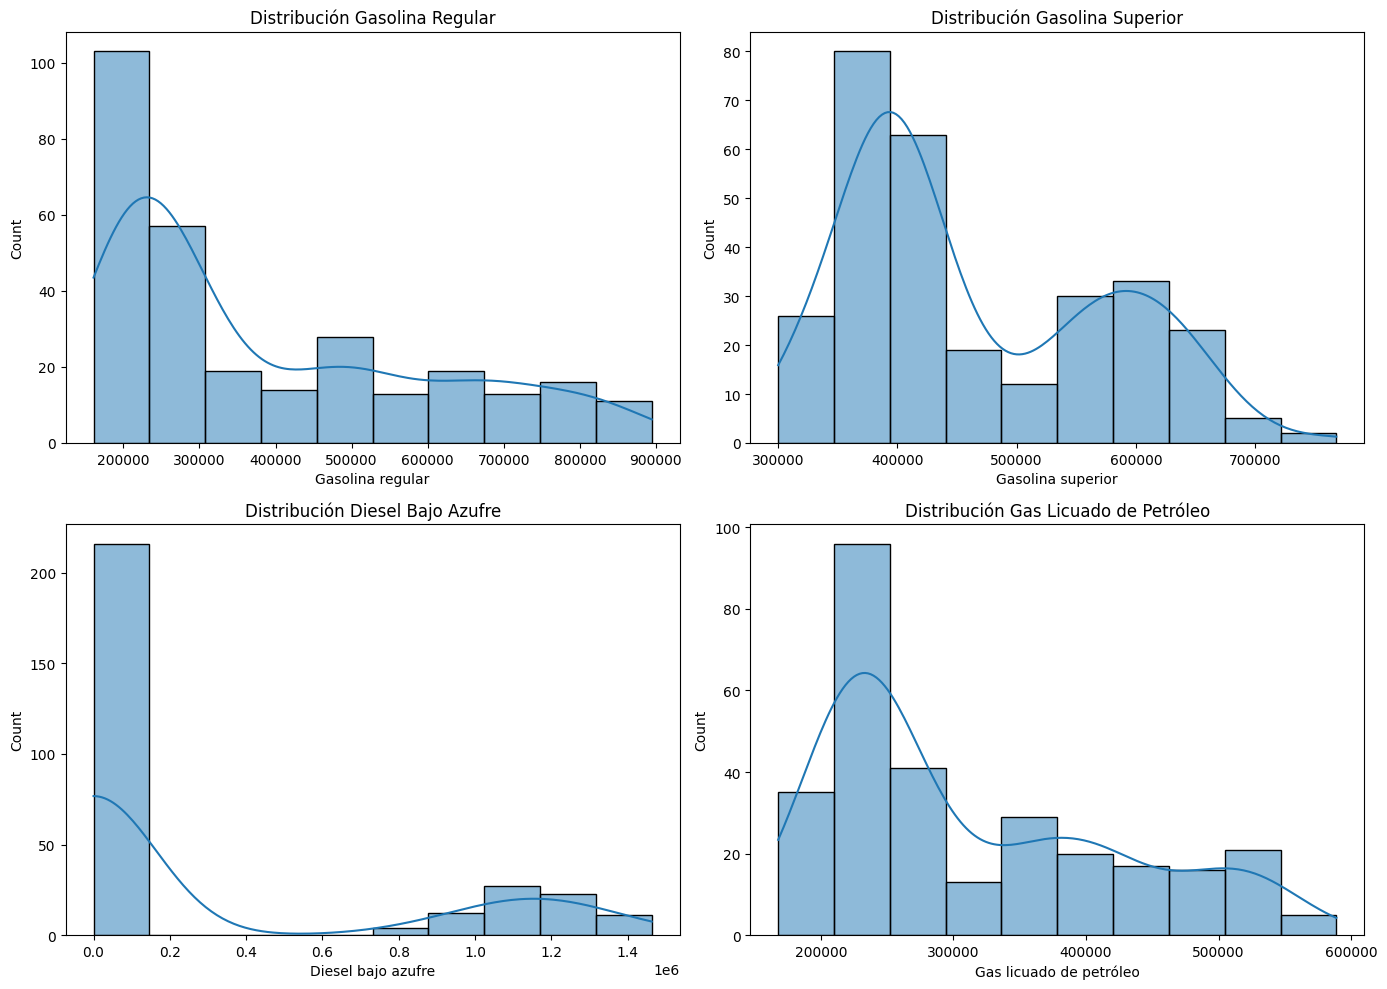

Gasolina Regular Normalidad: False
Gasolina Superior Normalidad: False
Diesel Bajo Azufre Normalidad: False
Gas Licuado de Petróleo Normalidad: False


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import normaltest

# Función para comprobar la normalidad
def check_normality(data):
    stat, p = normaltest(data)
    return p > 0.05

# Histograma de cada columna
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.histplot(consumo_df['Gasolina regular'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribución Gasolina Regular')

sns.histplot(consumo_df['Gasolina superior'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribución Gasolina Superior')

sns.histplot(consumo_df['Diesel bajo azufre'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribución Diesel Bajo Azufre')

sns.histplot(consumo_df['Gas licuado de petróleo'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribución Gas Licuado de Petróleo')

plt.tight_layout()
plt.show()

# Verificar normalidad
print("Gasolina Regular Normalidad:", check_normality(consumo_df['Gasolina regular']))
print("Gasolina Superior Normalidad:", check_normality(consumo_df['Gasolina superior']))
print("Diesel Bajo Azufre Normalidad:", check_normality(consumo_df['Diesel bajo azufre']))
print("Gas Licuado de Petróleo Normalidad:", check_normality(consumo_df['Gas licuado de petróleo']))


In [23]:
# Convertir la columna 'Fecha' a datetime si aún no se ha hecho
importacion_df['Fecha'] = pd.to_datetime(importacion_df['Fecha'])

# Crear las columnas 'Año' y 'Mes'
importacion_df['Año'] = importacion_df['Fecha'].dt.year
importacion_df['Mes'] = importacion_df['Fecha'].dt.month



         Fecha  Gasolina regular  Gasolina superior  Diesel bajo azufre  \
228 2020-01-01         629414.90          573220.63           999181.20   
229 2020-02-01         741509.07          611314.13          1237018.37   
230 2020-03-01         735491.29          809640.18          1367335.14   
231 2020-04-01         329134.18          453153.09           834366.52   
232 2020-05-01         415805.82          170292.50           691066.44   

     Gas licuado de petróleo   Año  Mes  
228                715600.32  2020    1  
229                451331.70  2020    2  
230                643278.89  2020    3  
231                510349.93  2020    4  
232                616381.45  2020    5  


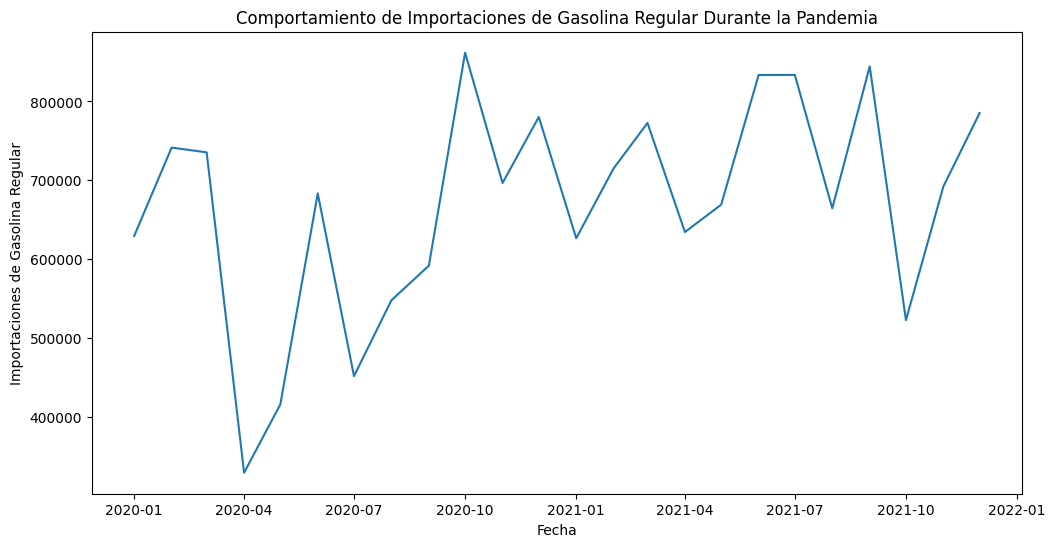

In [25]:
# Filtrar datos durante la pandemia
pandemia_df = importacion_df[(importacion_df['Año'] >= 2020) & (importacion_df['Año'] <= 2021)]

# Verificar el DataFrame filtrado
print(pandemia_df.head())

# Visualizar los datos
plt.figure(figsize=(12, 6))
sns.lineplot(data=pandemia_df, x='Fecha', y='Gasolina regular')
plt.title('Comportamiento de Importaciones de Gasolina Regular Durante la Pandemia')
plt.xlabel('Fecha')
plt.ylabel('Importaciones de Gasolina Regular')
plt.show()


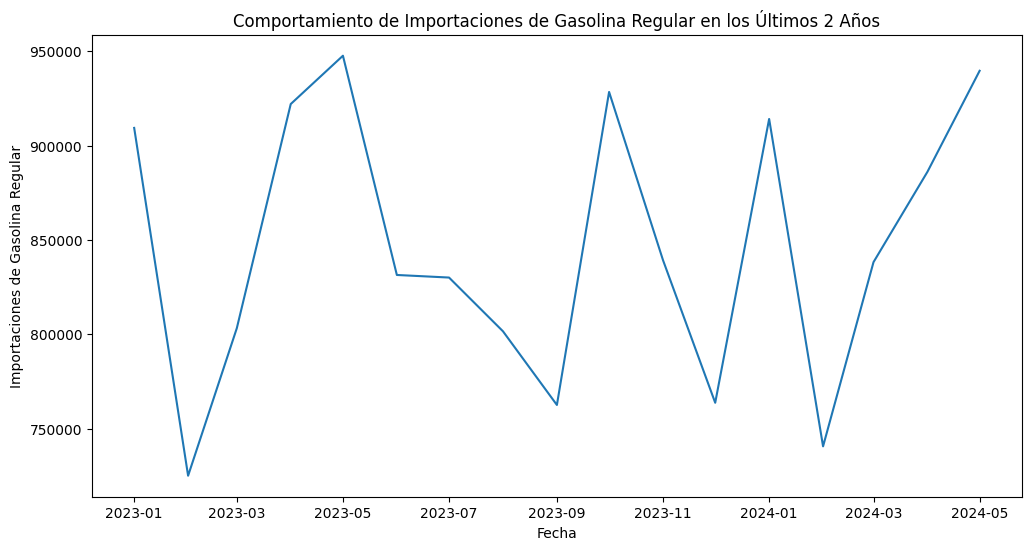

In [29]:
# Filtrar los últimos x años 
ultimos_anos_df = importacion_df[importacion_df['Año'] >= importacion_df['Año'].max() - 1]

plt.figure(figsize=(12, 6))
sns.lineplot(data=ultimos_anos_df, x='Fecha', y='Gasolina regular')
plt.title('Comportamiento de Importaciones de Gasolina Regular en los Últimos 2 Años')
plt.xlabel('Fecha')
plt.ylabel('Importaciones de Gasolina Regular')
plt.show()


In [36]:
# Eliminar filas con valores no válidos en la columna 'Fecha'
consumo_df = consumo_df[consumo_df['Fecha'].str.contains(r'\d{4}-\d{2}-\d{2}', na=False)]

# Convertir la columna 'Fecha' a datetime
consumo_df['Fecha'] = pd.to_datetime(consumo_df['Fecha'], errors='coerce')

# Eliminar filas con valores nulos en la columna 'Fecha' después de la conversión
consumo_df = consumo_df.dropna(subset=['Fecha'])

# Establecer la columna 'Fecha' como índice
consumo_df.set_index('Fecha', inplace=True)

# Resample para obtener el consumo mensual
consumo_mensual = consumo_df.resample('M').sum()


C:\Users\acer\AppData\Local\Temp\ipykernel_10652\1147759501.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  consumo_mensual = consumo_df.resample('M').sum()


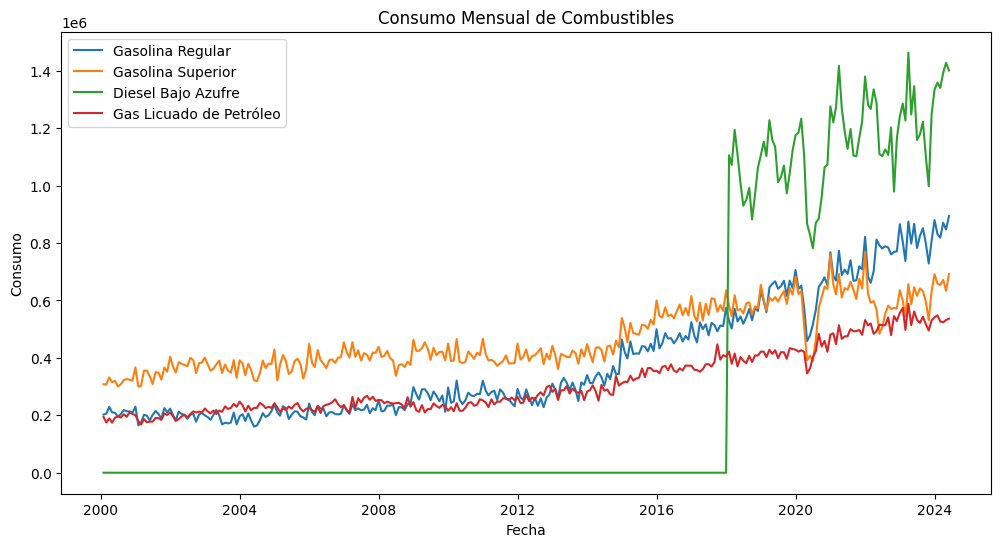

In [37]:
import matplotlib.pyplot as plt

# Graficar consumo mensual
plt.figure(figsize=(12, 6))
plt.plot(consumo_mensual.index, consumo_mensual['Gasolina regular'], label='Gasolina Regular')
plt.plot(consumo_mensual.index, consumo_mensual['Gasolina superior'], label='Gasolina Superior')
plt.plot(consumo_mensual.index, consumo_mensual['Diesel bajo azufre'], label='Diesel Bajo Azufre')
plt.plot(consumo_mensual.index, consumo_mensual['Gas licuado de petróleo'], label='Gas Licuado de Petróleo')
plt.title('Consumo Mensual de Combustibles')
plt.xlabel('Fecha')
plt.ylabel('Consumo')
plt.legend()
plt.show()


In [39]:
import pandas as pd

# Cargar los datos
importacion_df = pd.read_csv('Importacion.csv')

# Revisar las primeras filas para identificar posibles problemas
print(importacion_df.head())

# Filtrar columnas de interés
importacion_df = importacion_df[['Fecha', 'Gasolina regular', 'Gasolina superior', 'Diesel bajo azufre', 'Gas licuado de petróleo']]

# Convertir la columna 'Fecha' a datetime
importacion_df['Fecha'] = pd.to_datetime(importacion_df['Fecha'], errors='coerce')

# Eliminar filas con valores nulos en la columna 'Fecha'
importacion_df = importacion_df.dropna(subset=['Fecha'])

# Establecer la columna 'Fecha' como índice
importacion_df.set_index('Fecha', inplace=True)

# Resample para obtener la importación mensual
importacion_mensual = importacion_df.resample('M').sum()

# Verificar el DataFrame procesado
print(importacion_mensual.head())


                 Fecha  Aceites lubricantes  Asfalto      Bunker  Ceras  \
0  2001-01-01 00:00:00                  0.0  27748.99  214581.84    0.0   
1  2001-02-01 00:00:00                  0.0   7503.57  294609.00    0.0   
2  2001-03-01 00:00:00                  0.0  26304.32  315263.80    0.0   
3  2001-04-01 00:00:00                  0.0   7885.89  205653.00    0.0   
4  2001-05-01 00:00:00                  0.0   8443.16  278371.30    0.0   

   Combustible turbo jet  Diesel bajo azufre  Diesel ultra bajo azufre  \
0                    0.0                 0.0                       0.0   
1                    0.0                 0.0                       0.0   
2                    0.0                 0.0                       0.0   
3                    0.0                 0.0                       0.0   
4                    0.0                 0.0                       0.0   

   Gas licuado de petróleo  Gasolina de aviación  ...  Naftas  Petcoke  \
0            194065.738095    

C:\Users\acer\AppData\Local\Temp\ipykernel_10652\3918713361.py:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  importacion_mensual = importacion_df.resample('M').sum()


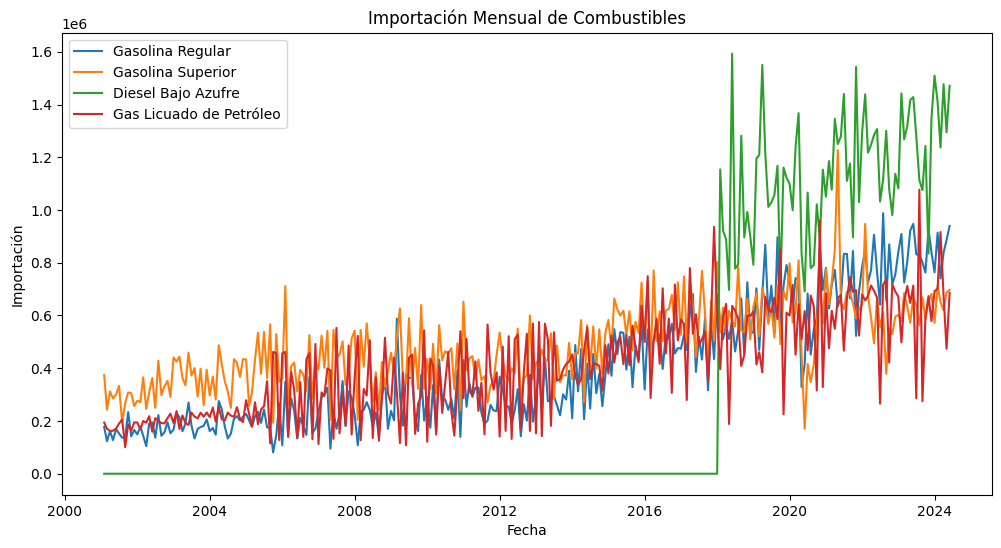

In [40]:
import matplotlib.pyplot as plt

# Graficar importación mensual
plt.figure(figsize=(12, 6))
plt.plot(importacion_mensual.index, importacion_mensual['Gasolina regular'], label='Gasolina Regular')
plt.plot(importacion_mensual.index, importacion_mensual['Gasolina superior'], label='Gasolina Superior')
plt.plot(importacion_mensual.index, importacion_mensual['Diesel bajo azufre'], label='Diesel Bajo Azufre')
plt.plot(importacion_mensual.index, importacion_mensual['Gas licuado de petróleo'], label='Gas Licuado de Petróleo')
plt.title('Importación Mensual de Combustibles')
plt.xlabel('Fecha')
plt.ylabel('Importación')
plt.legend()
plt.show()


In [41]:
import pandas as pd

# Cargar los datos
precios_df = pd.read_csv('Precios.csv')

# Revisar las primeras filas para identificar posibles problemas
print(precios_df.head())

# Filtrar columnas de interés
precios_df = precios_df[['FECHA', 'Regular', 'Superior', 'Diesel', 'Glp Cilindro 25Lbs.']]

# Renombrar columnas para mayor claridad
precios_df.rename(columns={'FECHA': 'Fecha', 'Regular': 'Gasolina regular', 'Superior': 'Gasolina superior', 'Diesel': 'Diesel', 'Glp Cilindro 25Lbs.': 'Gas licuado de petróleo'}, inplace=True)

# Convertir la columna 'Fecha' a datetime
precios_df['Fecha'] = pd.to_datetime(precios_df['Fecha'], errors='coerce')

# Eliminar filas con valores nulos en la columna 'Fecha'
precios_df = precios_df.dropna(subset=['Fecha'])

# Establecer la columna 'Fecha' como índice
precios_df.set_index('Fecha', inplace=True)

# Resample para obtener los precios mensuales
precios_mensuales = precios_df.resample('M').mean()

# Verificar el DataFrame procesado
print(precios_mensuales.head())


                 FECHA  Tipo de Cambio  Superior  Regular  Diesel  Bunker  \
0  2024-01-01 00:00:00         7.82702     30.44    28.95   29.47   18.99   
1  2024-01-02 00:00:00         7.82481     30.44    28.95   29.47   18.99   
2  2024-01-03 00:00:00         7.82445     30.47    28.97   29.48   18.99   
3  2024-01-04 00:00:00         7.82409     30.47    28.97   29.48   18.99   
4  2024-01-05 00:00:00         7.82322     30.47    28.97   29.48   18.99   

   Glp Cilindro 25Lbs.  Unnamed: 7  Sheet  
0                115.0         4.6   2024  
1                115.0         4.6   2024  
2                115.0         4.6   2024  
3                115.0         4.6   2024  
4                115.0         4.6   2024  
            Gasolina regular  Gasolina superior     Diesel  \
Fecha                                                        
2021-01-31         21.857419          22.657419  17.978065   
2021-02-28         23.460000          24.260000  19.460000   
2021-03-31         25.855

C:\Users\acer\AppData\Local\Temp\ipykernel_10652\3607944237.py:25: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  precios_mensuales = precios_df.resample('M').mean()


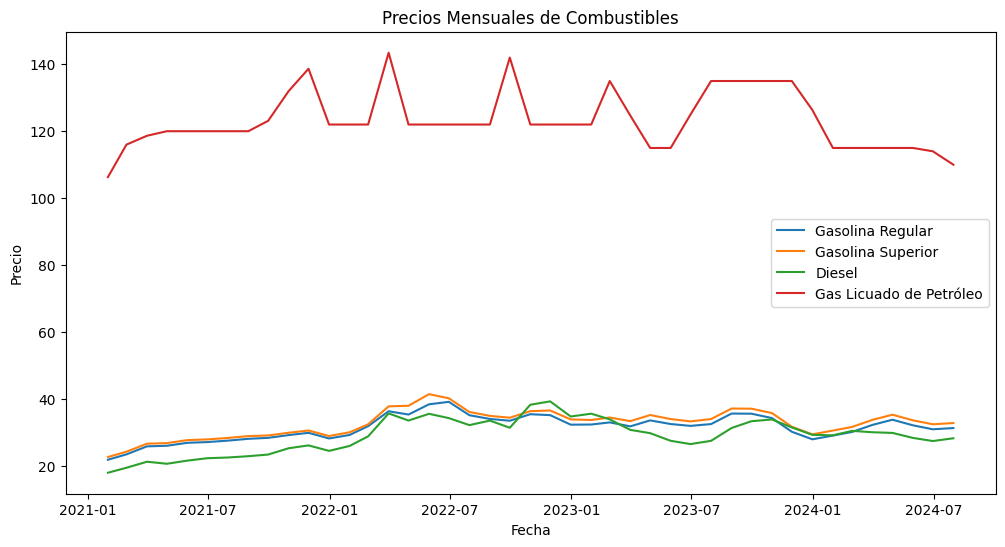

In [42]:
import matplotlib.pyplot as plt

# Graficar precios mensuales
plt.figure(figsize=(12, 6))
plt.plot(precios_mensuales.index, precios_mensuales['Gasolina regular'], label='Gasolina Regular')
plt.plot(precios_mensuales.index, precios_mensuales['Gasolina superior'], label='Gasolina Superior')
plt.plot(precios_mensuales.index, precios_mensuales['Diesel'], label='Diesel')
plt.plot(precios_mensuales.index, precios_mensuales['Gas licuado de petróleo'], label='Gas Licuado de Petróleo')
plt.title('Precios Mensuales de Combustibles')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.show()
